# Feature Engineering Hands-on (germany credit)

### Feature Engineering
    - 독일인 개인별 경제 Profile 데이터를 기반 실습 진행

### Hands-on
    - Data Load
    - Data Analysis
    - Feature Selection
    - Feature Sampling
    - Data Scaling & Encoding




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# library for feature engineering and EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from IPython.display import Image
from datetime import datetime

# library for statistic
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt


# library for sampling
from imblearn.combine import SMOTEENN

# library for machine learning
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline

## 1. Data Processing 1

### 1-1 Data Load

In [3]:
!pwd
path_lecture = "./drive/MyDrive/MLops/clip14_Feature Engineering/"
random_state = 1234

/content


In [36]:
df = pd.read_csv(path_lecture + "data/german_credit_risk_data.csv", sep=";")
df.head()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [37]:
df.columns

Index(['Creditability', 'Account_Balance', 'Duration_of_Credit_monthly',
       'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount',
       'Value_Savings_Stocks', 'Length_of_current_employment',
       'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors',
       'Duration_in_Current_address', 'Most_valuable_available_asset',
       'Age_years', 'Concurrent_Credits', 'Type_of_apartment',
       'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents',
       'Telephone', 'Foreign_Worker'],
      dtype='object')

###1-2 Check Duplicated Data

In [38]:
# To do

print("Duplicated Data Count:", len(df[df.duplicated()]) )

Duplicated Data Count: 0


## 2. Data EDA

### 2-1 Data Type and Summary

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit_monthly         1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit_Amount                      1000 non-null   int64
 6   Value_Savings_Stocks               1000 non-null   int64
 7   Length_of_current_employment       1000 non-null   int64
 8   Instalment_per_cent                1000 non-null   int64
 9   Sex_Marital_Status                 1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration_in_Current_address        1000 non-null   int64
 12  Most_valuable_availab

In [40]:
df.columns

Index(['Creditability', 'Account_Balance', 'Duration_of_Credit_monthly',
       'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount',
       'Value_Savings_Stocks', 'Length_of_current_employment',
       'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors',
       'Duration_in_Current_address', 'Most_valuable_available_asset',
       'Age_years', 'Concurrent_Credits', 'Type_of_apartment',
       'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents',
       'Telephone', 'Foreign_Worker'],
      dtype='object')

In [41]:
# categorical and numeric columns
for column_name in list(df.columns):
    print(column_name, df[column_name].dtype, df[column_name].unique()) # print out unique data

Creditability int64 [1 0]
Account_Balance int64 [1 2 4 3]
Duration_of_Credit_monthly int64 [18  9 12 10  8  6 24 11 30 48 36 15 42 21 27 33 28  4 47 14 39 60  5 22
 54 13 16  7 20 26 45 72 40]
Payment_Status_of_Previous_Credit int64 [4 2 3 0 1]
Purpose int64 [ 2  0  9  3  1 10  5  4  6  8]
Credit_Amount int64 [ 1049  2799   841  2122  2171  2241  3398  1361  1098  3758  3905  6187
  1957  7582  1936  2647  3939  3213  2337  7228  3676  3124  2384  1424
  4716  4771   652  1154  3556  4796  3017  3535  6614  1376  1721   860
  1495  1934  3378  3868   996  1755  1028  2825  1239  1216  1258  1864
  1474  1382   640  3919  1224  2331  6313   385  1655  1053  3160  3079
  1163  2679  3578 10875  1344  1237  3077  2284  1567  2032  2745  1867
  2299   929  3399  2030  3275  1940  1602  1979  2022  3342  5866  2360
  1520  3651  2346  4454   666  1965  1995  2991  4221  1364  6361  4526
  3573  4455  2136  5954  3777   806  4712  7432  1851  1393  1412  1473
  1533  2012  3959   428  2366  

# Why 'object'?
# In Pandas, the 'object' data type is commonly used to represent strings or mixed data types within a column. In this scenario, the code is likely changing these columns to 'object' because they represent categorical variables, which are often best handled as strings.

In [43]:
# categorical -> object
# Checking on unique value & data description, decide heuristically .

# To do
list_casting_as_object = ["Creditability", "Account_Balance", "Payment_Status_of_Previous_Credit",
                          "Purpose", "Length_of_current_employment", "Sex_Marital_Status",
                          "Guarantors", "Duration_in_Current_address", "Most_valuable_available_asset",
                          "Concurrent_Credits", "Type_of_apartment", "Occupation", "No_of_dependents",
                          "Telephone", "Foreign_Worker"]


for column_name in list_casting_as_object:
    df[column_name] = df[column_name].astype("object")
    ##

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Creditability                      1000 non-null   object
 1   Account_Balance                    1000 non-null   object
 2   Duration_of_Credit_monthly         1000 non-null   int64 
 3   Payment_Status_of_Previous_Credit  1000 non-null   object
 4   Purpose                            1000 non-null   object
 5   Credit_Amount                      1000 non-null   int64 
 6   Value_Savings_Stocks               1000 non-null   int64 
 7   Length_of_current_employment       1000 non-null   object
 8   Instalment_per_cent                1000 non-null   int64 
 9   Sex_Marital_Status                 1000 non-null   object
 10  Guarantors                         1000 non-null   object
 11  Duration_in_Current_address        1000 non-null   object
 12  Most_va

In [45]:
list_categorical_columns = list(df.select_dtypes(include=['object']).columns)
list_numeric_columns = list(df.select_dtypes(include=['int64']).columns)
print(len(df.columns))
print(len(list_categorical_columns))
print(len(list_numeric_columns))

21
15
6


In [46]:
target_column = "Creditability"

#### Summary of Data Set
##### - Number of Variables : 21
    numeric variables : 6
    categorical variables : 15 (target 포함)
##### - Number of observations : 1000
##### - Missing Cells : 0 columns
##### - Duplicated Rows : 0

### 2-2 Dependent Data Explore
#### Checking on 'Class Imbalance'

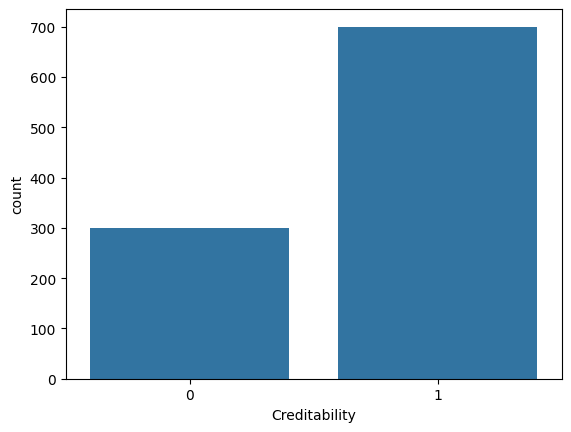

In [47]:
# To do
sns.countplot(x=target_column, data=df)
plt.show()


#### 1) Categorical Data Analysis

In [48]:
# Remove target column from categorical list before starting analytics
list_categorical_columns.remove(target_column)

##### Checking Unneccessary columns

In [49]:
df[list_categorical_columns].nunique().sort_values()
# 제거할 컬럼 없음

,0
No_of_dependents,2
Telephone,2
Foreign_Worker,2
Guarantors,3
Concurrent_Credits,3
Type_of_apartment,3
Account_Balance,4
Sex_Marital_Status,4
Duration_in_Current_address,4
Most_valuable_available_asset,4


##### Column별 분포 확인

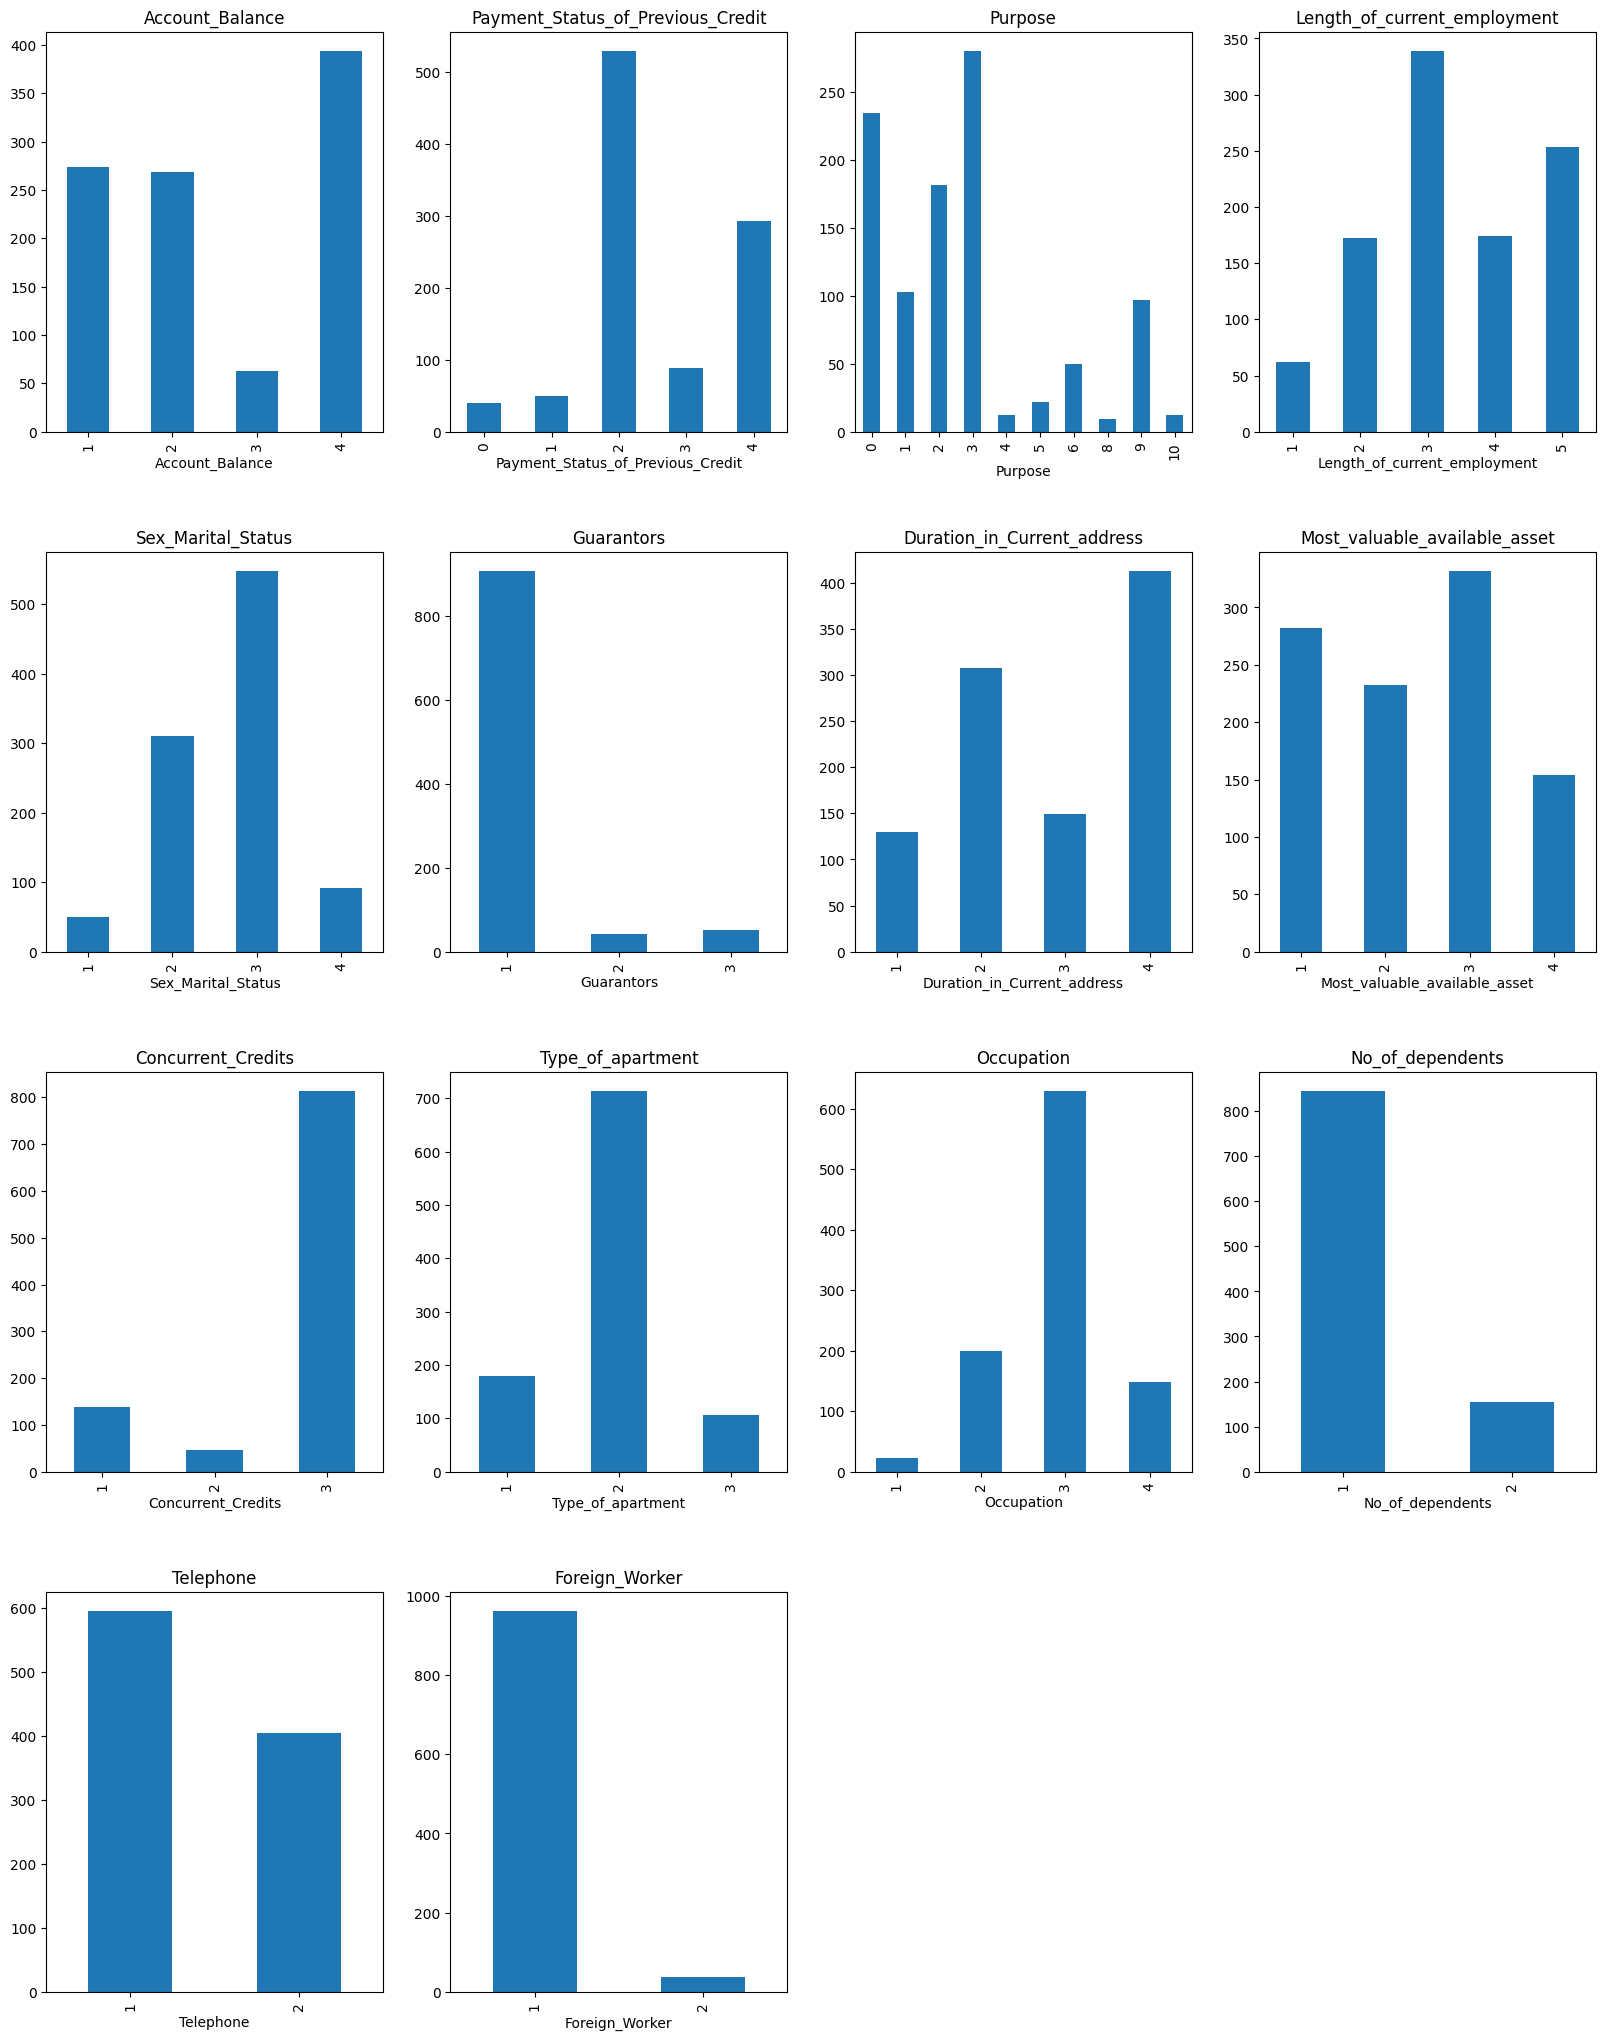

In [50]:
num_cols = len(list_categorical_columns)
num_rows = (num_cols + 3) // 4  # Calculate rows needed to accommodate all columns

plt.figure(figsize=(20, 5 * num_rows))  # Adjust figure size based on rows
x = 1
plt.subplots_adjust(top=0.99, bottom=0.01, hspace=0.3, wspace=0.2)

for column_name in list_categorical_columns:
    plt.subplot(num_rows, 4, x)  # Use calculated rows
    x = x + 1
    df[column_name].value_counts().sort_index().plot(kind='bar')
    plt.title(column_name)

plt.show()

##### Checking relation btw Target column and categorical column

<Figure size 3000x3000 with 0 Axes>

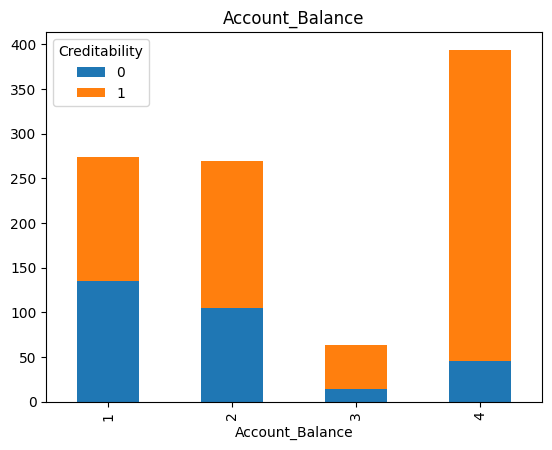

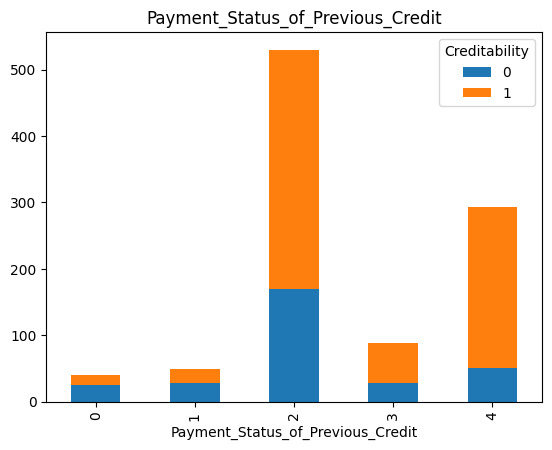

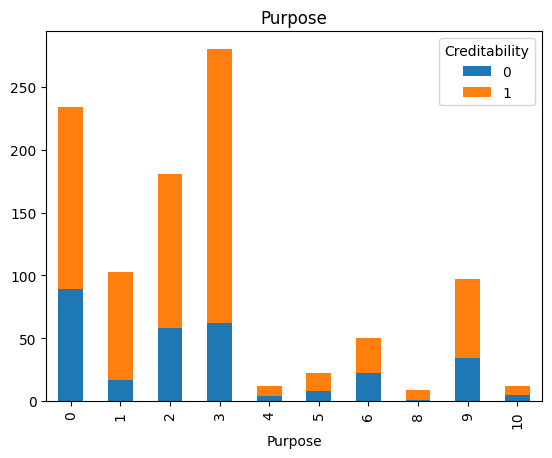

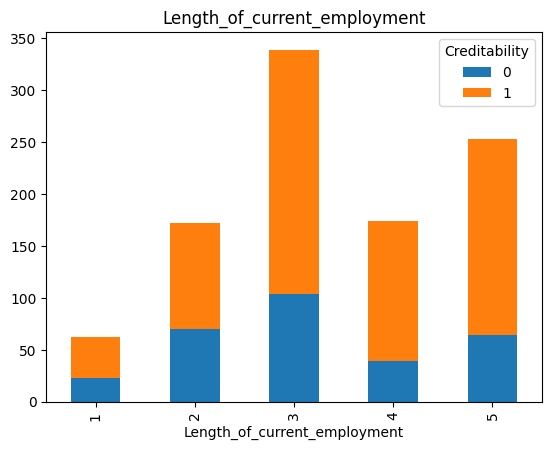

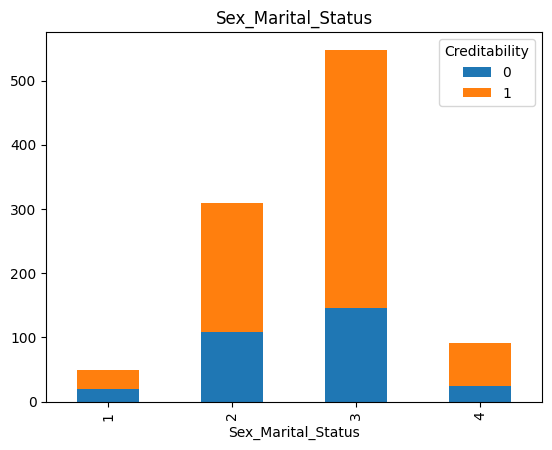

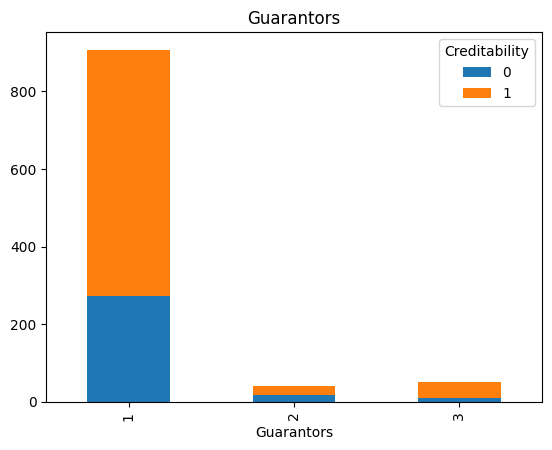

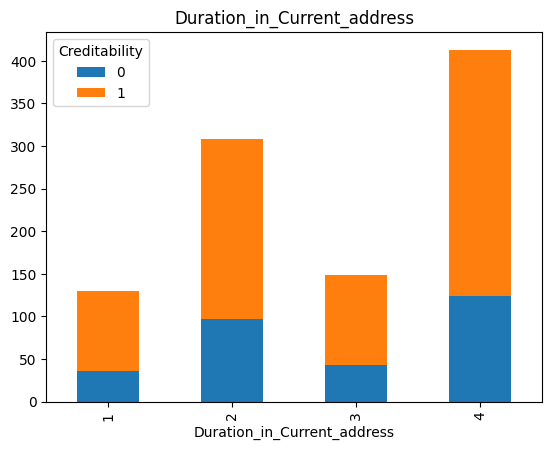

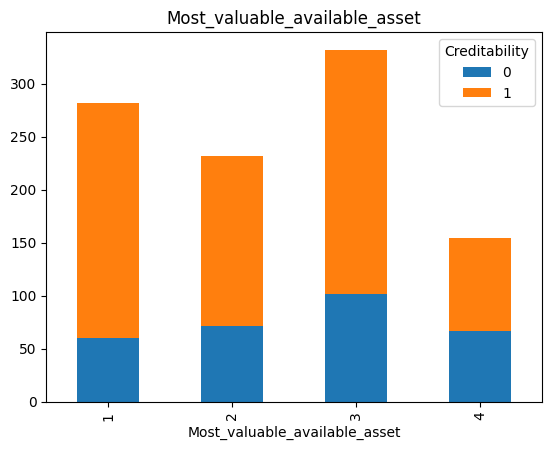

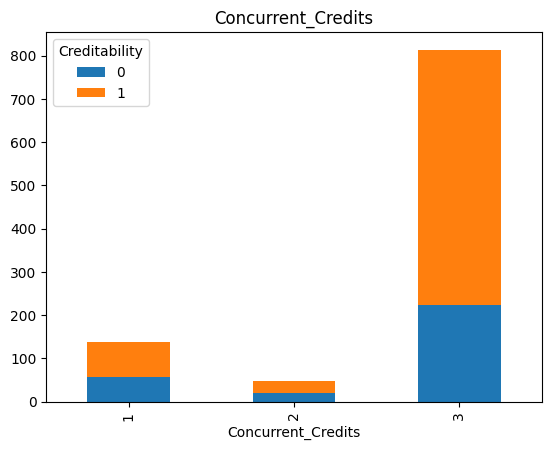

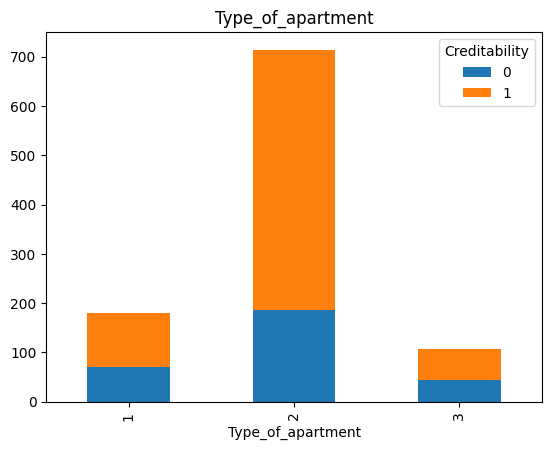

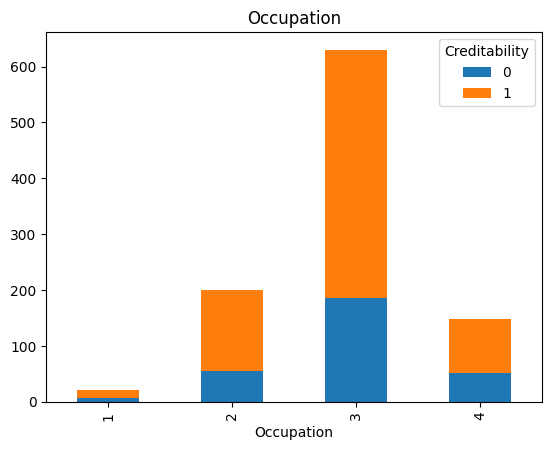

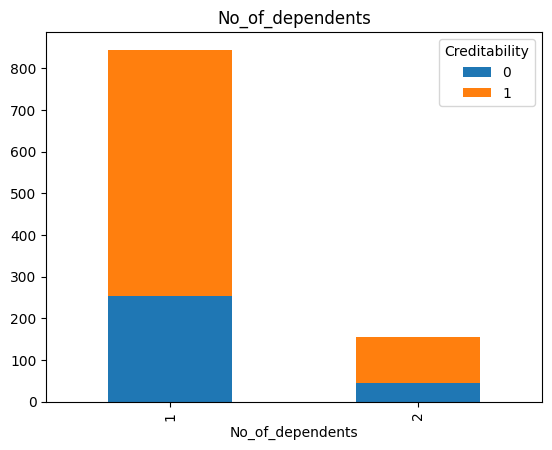

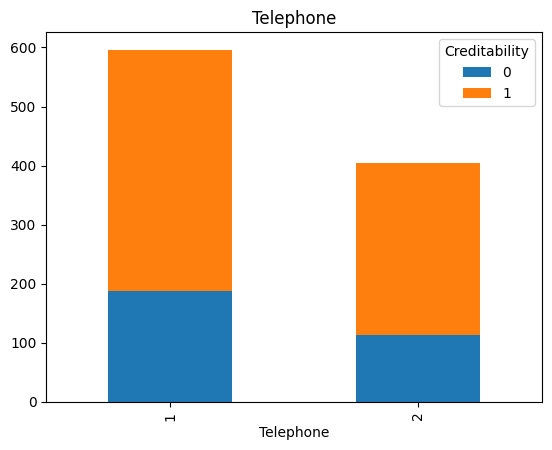

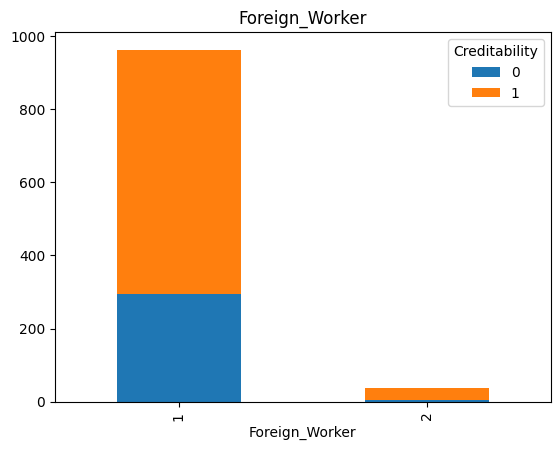

In [51]:
# categorical column과 dependent data(target column) 분포 분석
plt.figure(figsize=(30,30))
x = 1
#plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.8, wspace=0.2)
for column_name in list_categorical_columns:
    #plt.subplot(4,4,x)
    x = x+1
    df.groupby([column_name, "Creditability"]).count().iloc[:,1].unstack().plot(kind='bar', stacked=True)
    plt.title(column_name)
plt.show()


### Chi-squared Test (chisquare-test)
#The Chi-squared test is an analytical method used for two categorical variables.

#### Example: Comparing preferred movie genres based on gender.

#### In this practice: We validate the relationship between categorical column data (independent variables) and Creditability.

#### P-value: If the p-value is less than or equal to 0.05, we reject the null hypothesis. (The p-value threshold can vary. There is no fixed standard, but 0.05 is commonly used.)


#### Further Explanation of Chi-squared Test: 3 Types
1. Goodness of Fit Test
##### Number of variables: 1
##### Purpose: Tests if the observed data fits an expected distribution.
##### Example: There are 3 balls of different colors in a box, known to be in equal proportions. We draw 100 balls and record the proportion of each color. This test checks if the observed proportions follow the expected distribution.
##### Null hypothesis: The observed distribution of variable X is the same as the expected distribution.
##### Alternative hypothesis: The observed distribution of variable X is not the same as the expected distribution.
#### 2. Test of Independence
##### Number of variables: 2
##### Purpose: Tests if two categorical variables are related to each other.
##### Example: We survey 200 people to understand the relationship between gender and smoking habits.
##### Null hypothesis: Variables X and Y are independent.
##### Alternative hypothesis: Variables X and Y are not independent.
#### 3. Test of Homogeneity
##### Number of variables: 2
##### Purpose: This test is not about finding the relationship between two categorical variables. It aims to determine if different groups have the same distribution.
##### Example: After surveying smoking rates for men and women, we use this test to determine if the smoking rates are the same for both groups.
##### Null hypothesis: The probability distributions of each group are the same.
##### Alternative hypothesis: The probability distributions of each group are not the same.


##### 카이제곱 검정 추가 설명 : 3가지 유형
1.   적합도 검정 (Goodness of fit)
  - 변수 1개
  - 기존에 알려준 기준이 존재하는 검정
  - 예시) 상자 안에 공 3개가 같은 비율로 알려져 있음. 공 100개를 뽑았을 때, 각 색의 비율이 구해짐. -> 기존에 알려진 공 비율 분포를 따르는지 검정
  - 귀무가설 : 변수 X의 관측분포와 기대 분포가 동일
  - 대립가설 : 변수 X의 관측분포와 기대 분포가 동일하지 않음

2.   독립성 검정 (Test of independence)
  - 변수 2개
  - 범주형 두 변수가 서로 연관되어 있는지 여부를 검정
  - 예시) 성별과 흡연 여부 관계를 알고 싶어서 200명을 추출하여 조사한 경우.
  - 귀무가설 : 변수 X와 Y는 서로 독립
  - 대립가설 : 변수 X와 Y는 서로 독립이 아님
3.   동질성 검정 (Test of Homogeneity)
  - 변수 2개
  - 범주형 두 변수의 관계를 알기 위한 검정은 아님
  - 각 그룹들이 동질한지 알고 싶은 검정
  - 예시) 남자와 여자 흡연율 차이가 있는지 흡연율을 조사한 후, 두 그룹의 흡연율이 같은지 여부를 검정
  - 귀무가설 : 각 그룹의 확률분포가 동일
  - 대립가설 : 각 그룹의 확률분포가 동일하지 않음




In [52]:
pd.crosstab(df["Creditability"], df["Guarantors"])

Guarantors,1,2,3
Creditability,,,
0,272,18,10
1,635,23,42


pvalue <= 0.05: This is the condition for selecting a feature. If the p-value is less than or equal to 0.05 (a common threshold), it suggests a statistically significant relationship between the current feature (column_name) and Creditability.

In [53]:
# To do
list_meaningful_column_by_chi = []

for column_name in list_categorical_columns:
  if column_name == target_column:
    continue
  statistics, pvalue, _, _ = chi2_contingency(pd.crosstab(df["Creditability"], df[column_name]))
  print(column_name,", ", pvalue,", ",statistics)
  if pvalue <= 0.05:
    list_meaningful_column_by_chi.append(column_name)

print("all categorical columns : ", len(list_categorical_columns))
print("selected columns by chi : ", len(list_meaningful_column_by_chi), list_meaningful_column_by_chi)

Account_Balance ,  1.2189020722893755e-26 ,  123.7209435162656
Payment_Status_of_Previous_Credit ,  1.2791872956750918e-12 ,  61.69139696459551
Purpose ,  0.00011574910079691586 ,  33.35644686141815
Length_of_current_employment ,  0.0010454523491402541 ,  18.3682738466968
Sex_Marital_Status ,  0.02223800546926877 ,  9.60521395933605
Guarantors ,  0.036055954027247206 ,  6.645366537264244
Duration_in_Current_address ,  0.8615521320413175 ,  0.7492964483880513
Most_valuable_available_asset ,  2.8584415733250017e-05 ,  23.719551283864707
Concurrent_Credits ,  0.0016293178186473534 ,  12.839187735866137
Type_of_apartment ,  8.810311250241031e-05 ,  18.674005392894895
Occupation ,  0.5965815918843431 ,  1.8851560280131707
No_of_dependents ,  1.0 ,  0.0
Telephone ,  0.2788761543035742 ,  1.1725585310208857
Foreign_Worker ,  0.015830754902852885 ,  5.821575915033861
all categorical columns :  14
selected columns by chi :  10 ['Account_Balance', 'Payment_Status_of_Previous_Credit', 'Purpose', 

##### Insight
1.   Finding categorical data that is not releated to Creditability(dependent variable).
2.   uses the results from #1 for feature selection and model optimization



#### 2) Numeric Data Analysis

##### Checking on unnecessary columns

In [58]:
df[list_numeric_columns].nunique().sort_values()

,0
Instalment_per_cent,4
No_of_Credits_at_this_Bank,4
Value_Savings_Stocks,5
Duration_of_Credit_monthly,33
Age_years,53
Credit_Amount,923


<Axes: xlabel='Credit_Amount', ylabel='Count'>

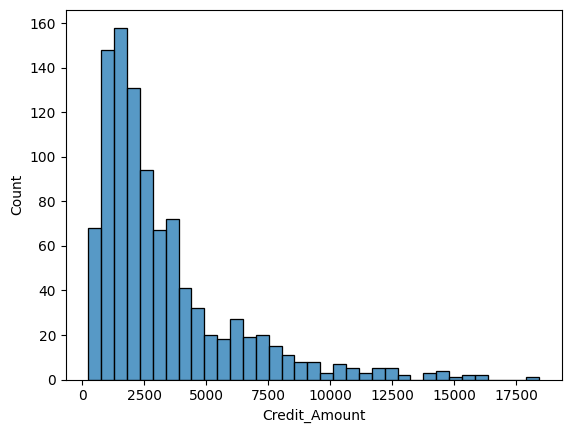

In [59]:
#Credit_Amount가 데이터 수와 유사한 수준의 unique() 값을 보이므로, histplot으로 한 번 더 확인.
sns.histplot(x="Credit_Amount", data=df)

##### Checking the distribution of each numeric column

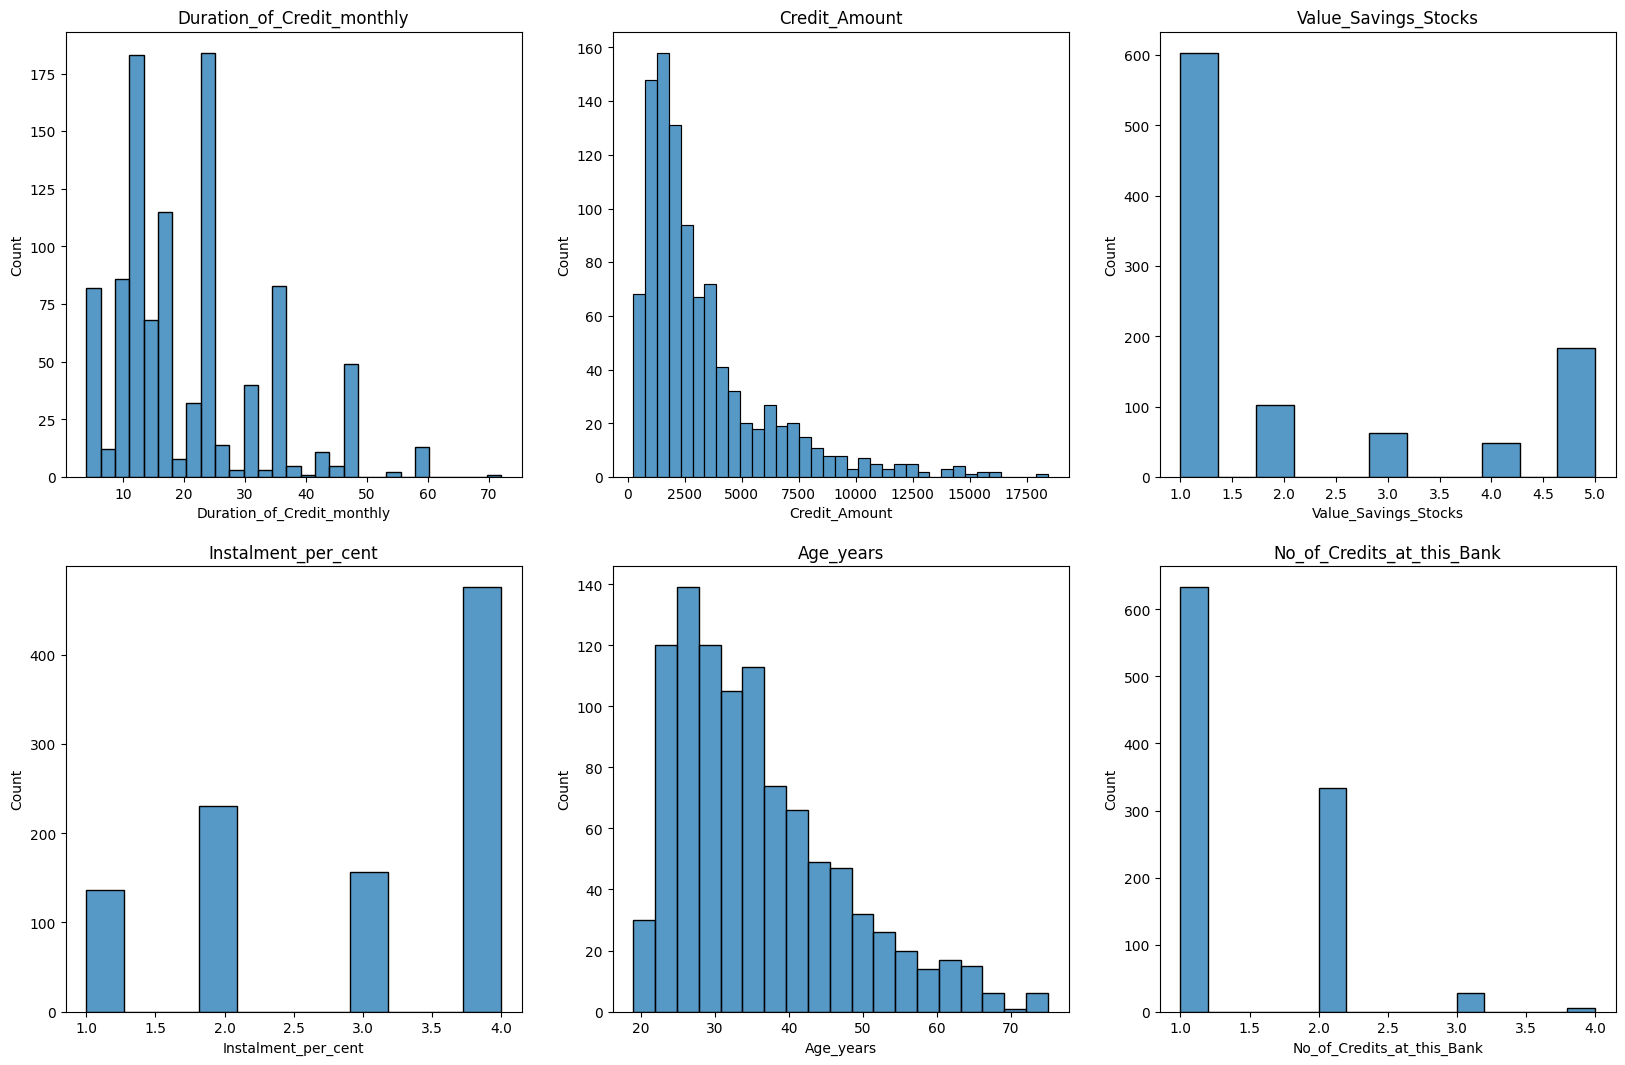

In [62]:
# Checking the distribution of each numeric column
plt.figure(figsize=(20,10))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)
for column_name in list_numeric_columns:
    plt.subplot(2,3,x)
    x = x+1
    sns.histplot(x=column_name, data=df)
    plt.title(column_name)
plt.show()

In [61]:
for column_name in list_numeric_columns:
  print(column_name, "skew : ", skew(df[column_name]))
  print(column_name, "kur : ", kurtosis(df[column_name]))

# Check the necessity of feature preprocessing using scaling later.

Duration_of_Credit_monthly skew :  1.0925422109540106
Duration_of_Credit_monthly kur :  0.9091948811374047
Credit_Amount skew :  1.9466686761323513
Credit_Amount kur :  4.265054224176543
Value_Savings_Stocks skew :  1.0151512255589377
Value_Savings_Stocks kur :  -0.6828220851514768
Instalment_per_cent skew :  -0.5305507598158565
Instalment_per_cent kur :  -1.210423225610213
Age_years skew :  1.023174316054808
Age_years kur :  0.6114371688367677
No_of_Credits_at_this_Bank skew :  1.2706663071344098
No_of_Credits_at_this_Bank kur :  1.5904343926328481


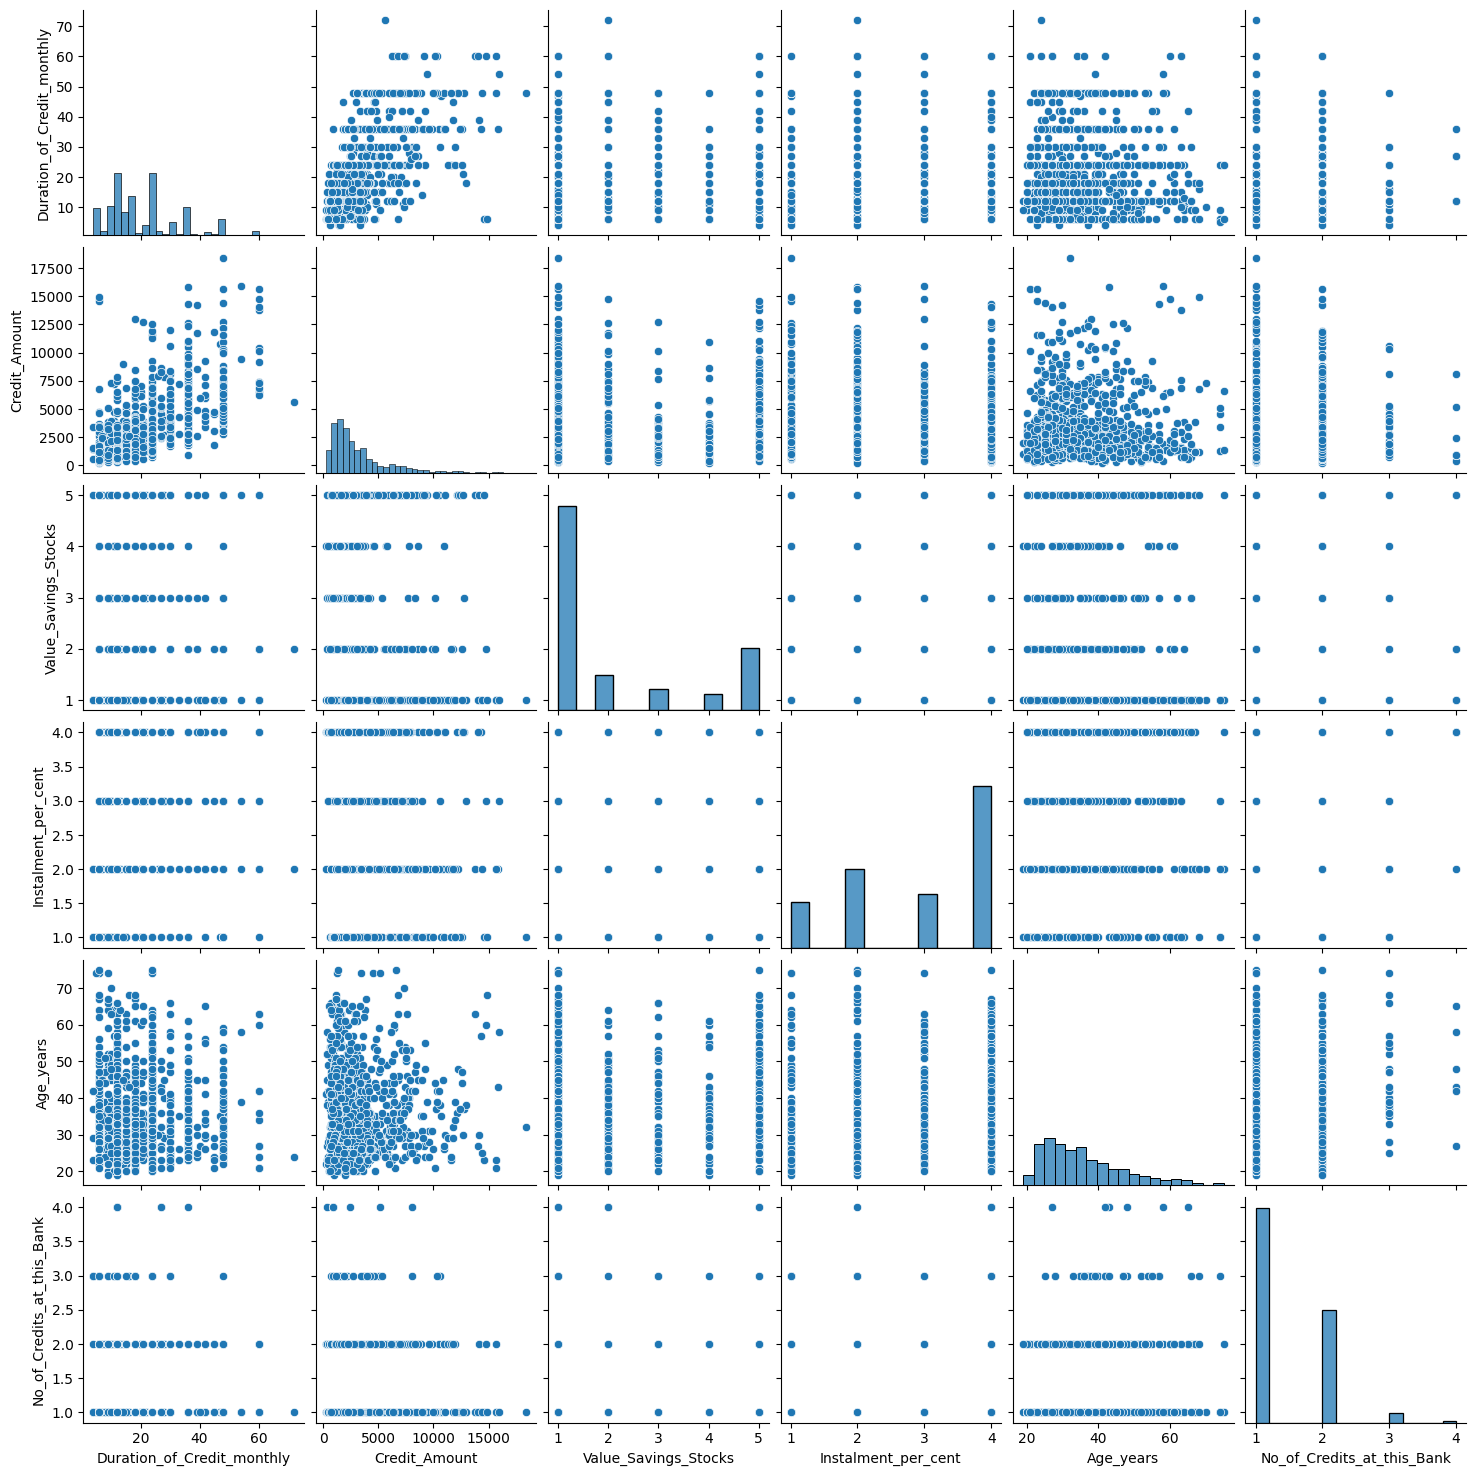

In [63]:
sns.pairplot(data=df.loc[:, list_numeric_columns])

# 1. As the desired loan amount increases, the desired loan duration also tends to increase.
# 2. There seems to be no correlation between savings and the repayment installment rate relative to income.
# 3. People who have 3 or more loans with the bank do not tend to have long desired loan durations.

##### Correlation Analysis

<Axes: >

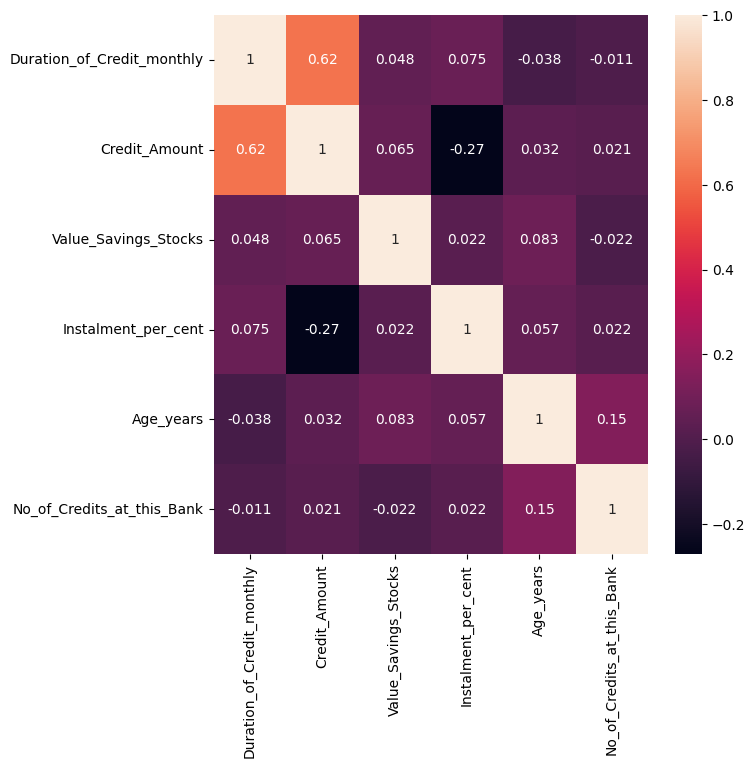

In [64]:
# To do
# Correleation
plt.figure(figsize=(7,7))
sns.heatmap(df[list_numeric_columns].corr(),annot=True)



##### Target Column과 numeric Column 관계 분포 확인

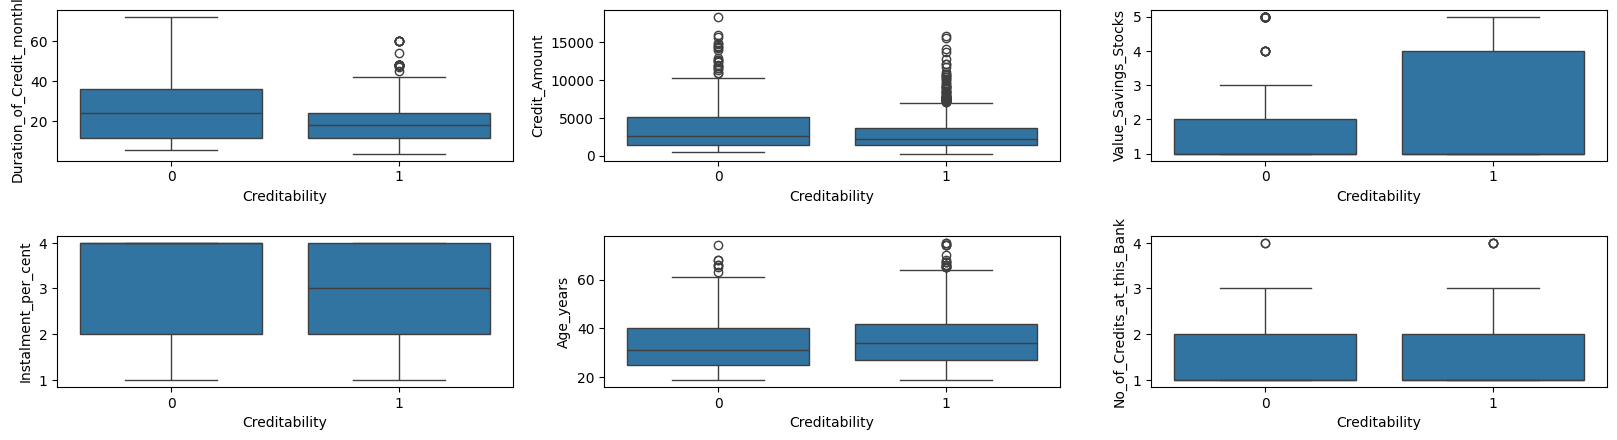

In [65]:
plt.figure(figsize=(20,20))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.2)
for column_name in list_numeric_columns:
    plt.subplot(9,3,x)
    x = x + 1
    sns.boxplot(data=df,x='Creditability',y=column_name)
plt.show()

##### ANOVA
*   ANOVA assumes normality, homogeneity of variances, and independence of observations. If these assumptions are violated, the results of the test may not be reliable. Consider using non-parametric alternatives like the Kruskal-Wallis test if the assumptions are not met.


###Normality Test

#### Data must satisfy normality for ANOVA (Analysis of Variance).
#### Various methods can be used to test for normality: Q-Q plot, Shapiro-Wilk test.


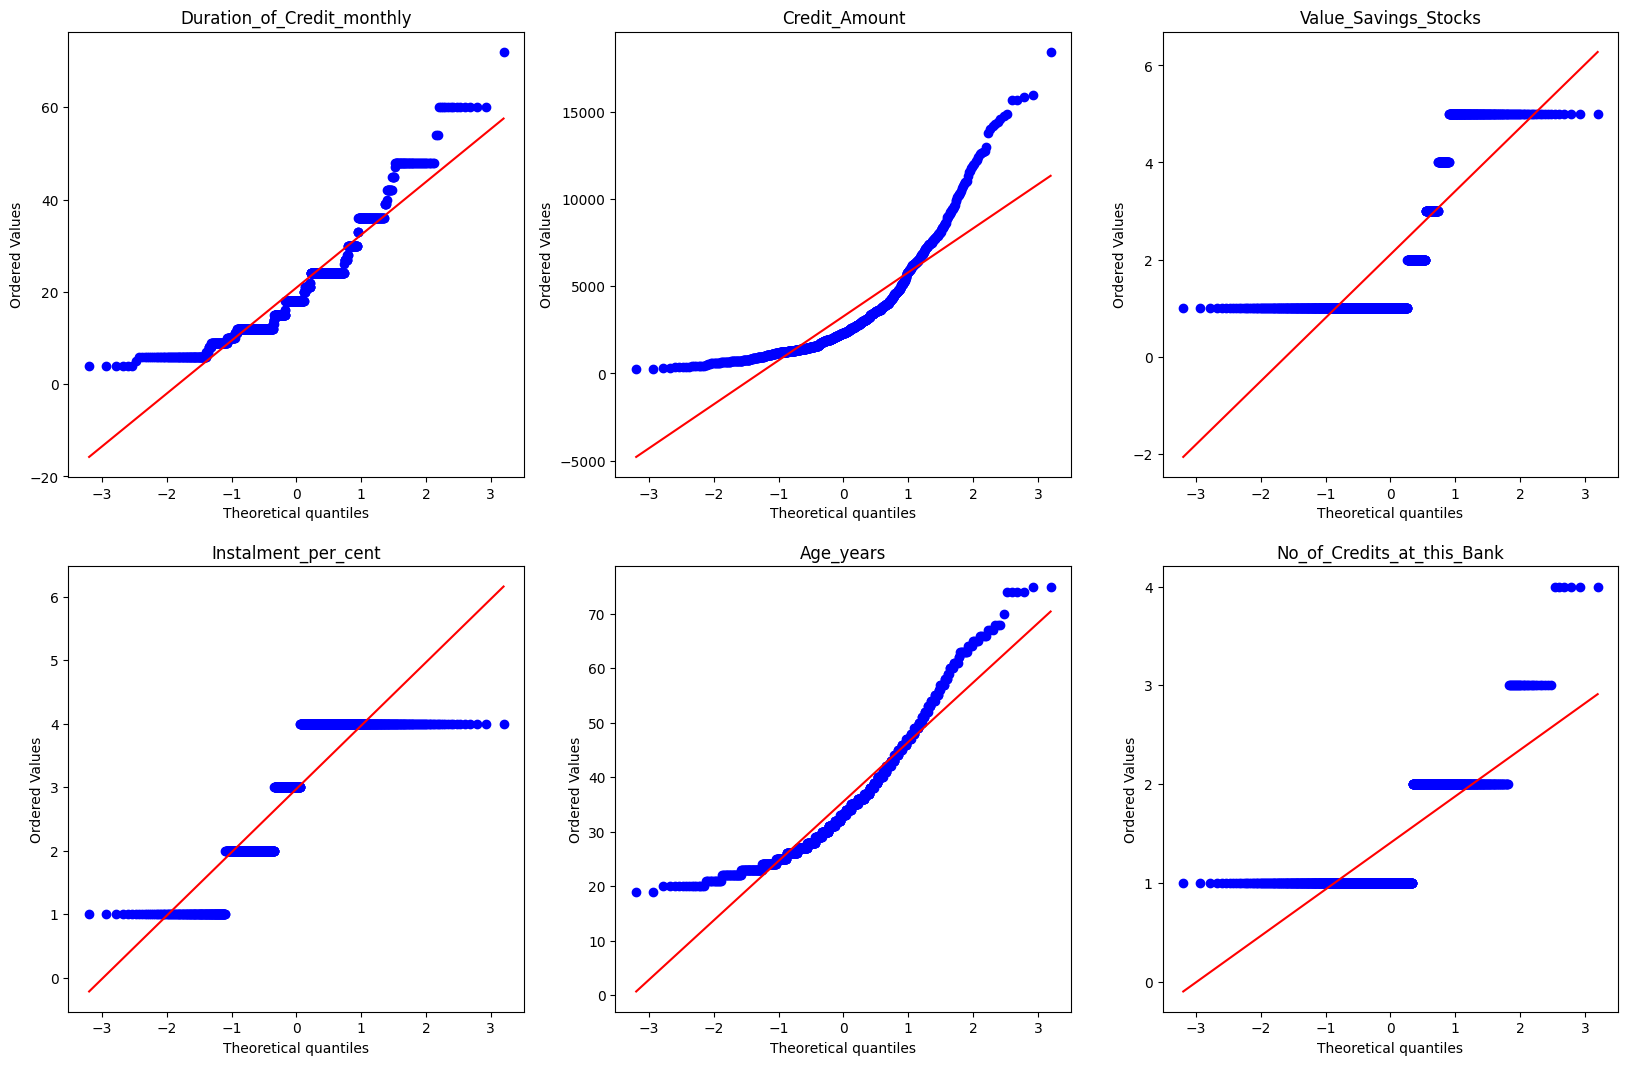

In [66]:

# To do
plt.figure(figsize=(20,10))
x= 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)
for column_name in list_numeric_columns:
    plt.subplot(2,3,x)
    x = x+1
    stats.probplot(df[column_name], dist=stats.norm, plot=plt)
    plt.title(column_name)
plt.show()



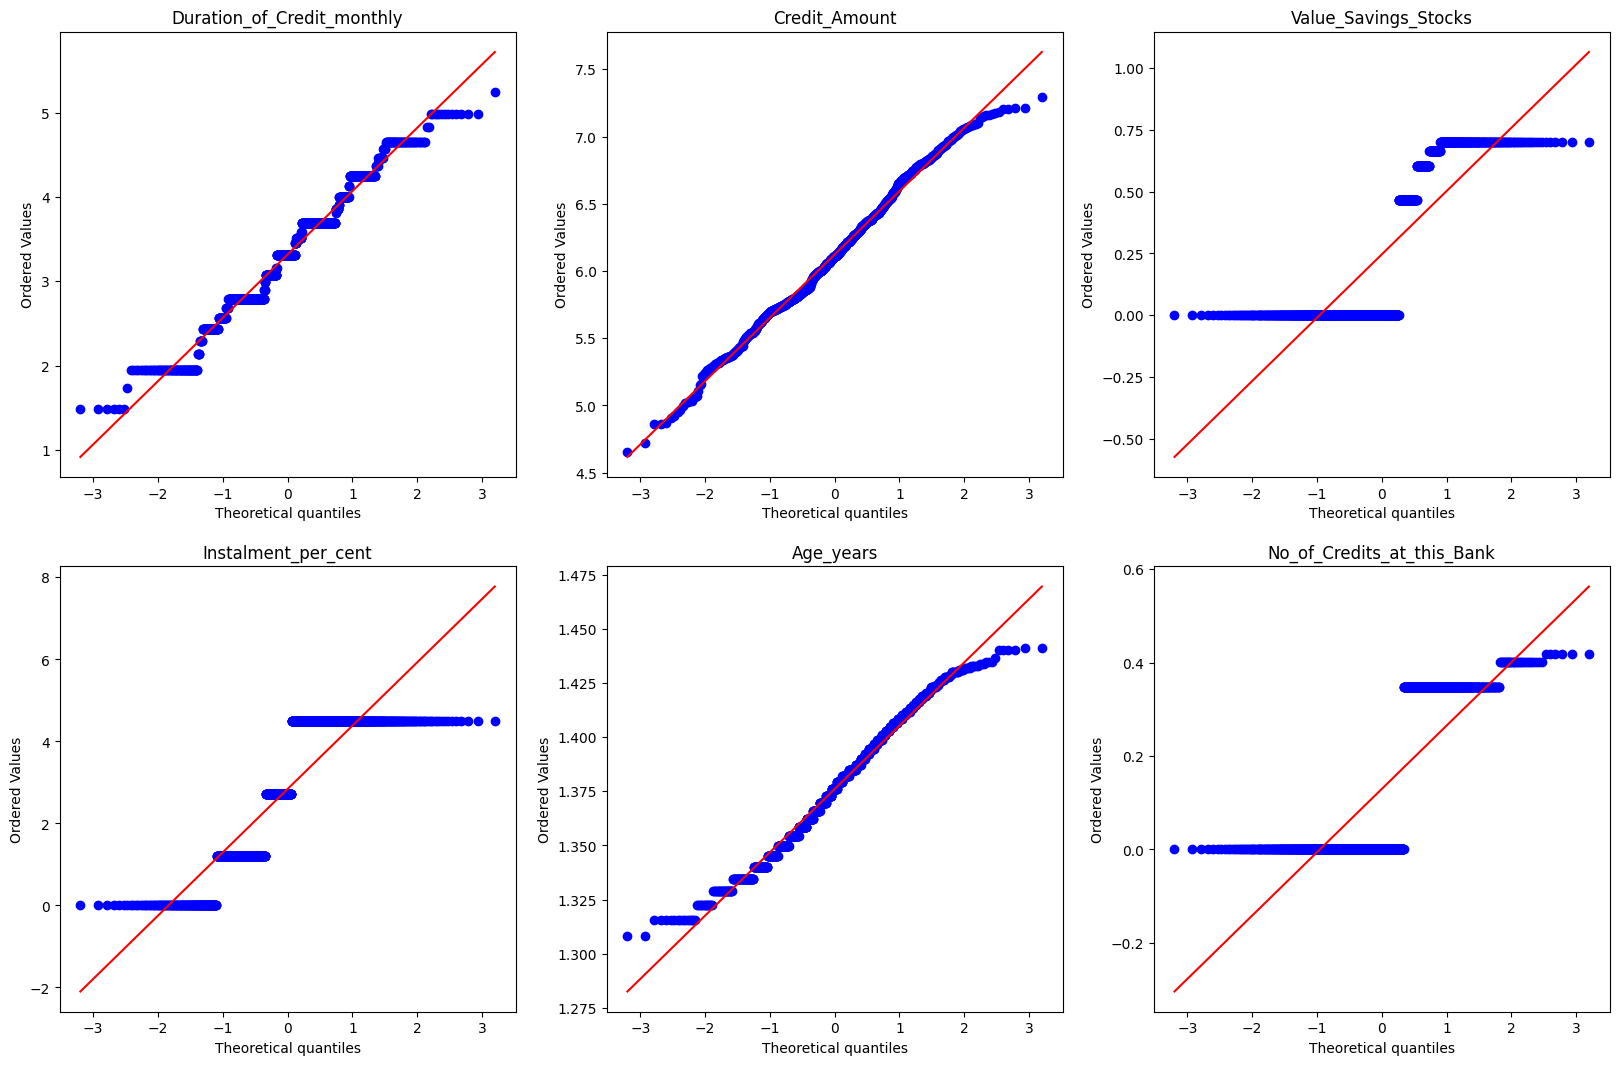

In [67]:

plt.figure(figsize=(20,10))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)
for column_name in list_numeric_columns:
    plt.subplot(2,3,x)
    x = x+1
    stats.probplot(stats.boxcox(df[column_name])[0], dist=stats.norm, plot=plt)
    plt.title(column_name)
plt.show()

Normality is not satisfied.
*   Since normality is not satisfied, there is no need for a homogeneity of variance test (homogeneity of variance assumes normality).
*   Testing numeric data using one-way ANOVA is not possible.

##### This suggests using the Kruskal-Wallis test, which is a non-parametric test.
*   Kruskal-Wallis test does not require normality or homogeneity of variance.


In [74]:
# kruskall 검정
list_meaningful_column_by_kruskall = []


# To do
for column_name in list_numeric_columns:
  list_by_value=[]
  for value in df[target_column].dropna().unique():
    df_tmp = df[df[target_column]==value][column_name].dropna()
    list_by_value.append(np.array(df_tmp))
  statistics, pvalue = kruskal(*list_by_value)
  if pvalue <= 0.05:
    list_meaningful_column_by_kruskall.append(column_name)
  print(column_name,", ", pvalue,", ",statistics)


print("all numberical columns : ", len(list_numeric_columns))
print("selected columns by kruskal : ", len(list_meaningful_column_by_kruskall), list_meaningful_column_by_kruskall)

Duration_of_Credit_monthly ,  7.975280722435737e-11 ,  42.263859684710084
Credit_Amount ,  0.005915450904320812 ,  7.575879507631307
Value_Savings_Stocks ,  3.0687280146351794e-08 ,  30.663570435469385
Instalment_per_cent ,  0.01985327596986272 ,  5.424750145998911
Age_years ,  0.00034474934315396557 ,  12.810120621447924
No_of_Credits_at_this_Bank ,  0.13478191734200565 ,  2.236544135434218
all numberical columns :  6
selected columns by kruskal :  5 ['Duration_of_Credit_monthly', 'Credit_Amount', 'Value_Savings_Stocks', 'Instalment_per_cent', 'Age_years']


##### Insight
1. Insignificant Numerical Data: Some numerical data show no significant relationship with Creditability (the dependent variable). (5 out of 6 numerical features exhibit significant interaction.)
2. Feature Selection and Optimization: The findings from point 1 can be utilized for feature selection and model optimization.
3. No Strong Correlation: There is no strong correlation observed among the numerical data.
4. Skewness and Kurtosis: Certain numerical data exhibit a tendency where kurtosis is greater than skewness. This characteristic can be addressed during preprocessing to normalize data distribution.


## 3. Data Processing 2

### 3-1 Missing Values

In [75]:
# To do
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Creditability                      1000 non-null   object
 1   Account_Balance                    1000 non-null   object
 2   Duration_of_Credit_monthly         1000 non-null   int64 
 3   Payment_Status_of_Previous_Credit  1000 non-null   object
 4   Purpose                            1000 non-null   object
 5   Credit_Amount                      1000 non-null   int64 
 6   Value_Savings_Stocks               1000 non-null   int64 
 7   Length_of_current_employment       1000 non-null   object
 8   Instalment_per_cent                1000 non-null   int64 
 9   Sex_Marital_Status                 1000 non-null   object
 10  Guarantors                         1000 non-null   object
 11  Duration_in_Current_address        1000 non-null   object
 12  Most_va

In [76]:
df.isna().sum().sort_values(ascending=False)

,0
Creditability,0
Duration_in_Current_address,0
Telephone,0
No_of_dependents,0
Occupation,0
No_of_Credits_at_this_Bank,0
Type_of_apartment,0
Concurrent_Credits,0
Age_years,0
Most_valuable_available_asset,0


### 3-2 Encoding and Feature Selection

In [77]:
Y = df[target_column]
X = df.drop([target_column], axis=1)

##### Label Encoding

In [78]:
Y

,Creditability
0,1
1,1
2,1
3,1
4,1
...,...
995,0
996,0
997,0
998,0


### Y_encoded: This line simply refers to the target variable (Creditability) which has been encoded into numerical form using Label Encoding.

In [83]:
# To do

le_encoder = LabelEncoder()
Y_encoded = le_encoder.fit_transform(Y)

Y_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [88]:
print(list_meaningful_column_by_chi)
print(list_meaningful_column_by_kruskall)
print(list_meaningful_column_by_chi + list_meaningful_column_by_kruskall)

['Account_Balance', 'Payment_Status_of_Previous_Credit', 'Purpose', 'Length_of_current_employment', 'Sex_Marital_Status', 'Guarantors', 'Most_valuable_available_asset', 'Concurrent_Credits', 'Type_of_apartment', 'Foreign_Worker']
['Duration_of_Credit_monthly', 'Credit_Amount', 'Value_Savings_Stocks', 'Instalment_per_cent', 'Age_years']
['Account_Balance', 'Payment_Status_of_Previous_Credit', 'Purpose', 'Length_of_current_employment', 'Sex_Marital_Status', 'Guarantors', 'Most_valuable_available_asset', 'Concurrent_Credits', 'Type_of_apartment', 'Foreign_Worker', 'Duration_of_Credit_monthly', 'Credit_Amount', 'Value_Savings_Stocks', 'Instalment_per_cent', 'Age_years']


##### Feature Selection

In [91]:
# To do
X_fs = df[list_meaningful_column_by_chi + list_meaningful_column_by_kruskall]
X_fs

,Account_Balance,Payment_Status_of_Previous_Credit,Purpose,Length_of_current_employment,Sex_Marital_Status,Guarantors,Most_valuable_available_asset,Concurrent_Credits,Type_of_apartment,Foreign_Worker,Duration_of_Credit_monthly,Credit_Amount,Value_Savings_Stocks,Instalment_per_cent,Age_years
0,1,4,2,2,2,1,2,3,1,1,18,1049,1,4,21
1,1,4,0,3,3,1,1,3,1,1,9,2799,1,2,36
2,2,2,9,4,2,1,1,3,1,1,12,841,2,2,23
3,1,4,0,3,3,1,1,3,1,2,12,2122,1,3,39
4,1,4,0,3,3,1,2,1,2,2,12,2171,1,4,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,2,3,3,3,1,1,3,1,1,24,1987,1,2,21
996,1,2,0,5,3,2,1,3,2,1,24,2303,1,4,45
997,4,4,0,5,3,1,4,3,3,1,21,12680,5,4,30
998,2,2,3,1,3,1,4,3,2,1,12,6468,5,2,52


In [92]:
print(len(X.columns))
print(len(X_fs.columns))

20
15


##### Feature Transformation
*   Standardization is difference from Normalization.
*   Normalization is the process of scaling values to a range of 0 to 1. (For example, using MinMaxScaler from sklearn)
* Standardization is the process of scaling values using the standardization method of normal distribution. (For example, using StandardScaler from sklearn)

In [93]:
X_fs.head(2)

,Account_Balance,Payment_Status_of_Previous_Credit,Purpose,Length_of_current_employment,Sex_Marital_Status,Guarantors,Most_valuable_available_asset,Concurrent_Credits,Type_of_apartment,Foreign_Worker,Duration_of_Credit_monthly,Credit_Amount,Value_Savings_Stocks,Instalment_per_cent,Age_years
0,1,4,2,2,2,1,2,3,1,1,18,1049,1,4,21
1,1,4,0,3,3,1,1,3,1,1,9,2799,1,2,36


In [98]:
# To do
scaler = StandardScaler()
X_fs.loc[:, list_meaningful_column_by_kruskall] = scaler.fit_transform(X_fs[list_meaningful_column_by_kruskall])
X_fs.head(2)

,Account_Balance,Payment_Status_of_Previous_Credit,Purpose,Length_of_current_employment,Sex_Marital_Status,Guarantors,Most_valuable_available_asset,Concurrent_Credits,Type_of_apartment,Foreign_Worker,Duration_of_Credit_monthly,Credit_Amount,Value_Savings_Stocks,Instalment_per_cent,Age_years
0,1,4,2,2,2,1,2,3,1,1,-0.240857,-0.787657,-0.699707,0.918477,-1.281573
1,1,4,0,3,3,1,1,3,1,1,-0.987573,-0.167384,-0.699707,-0.870183,0.040363


In [99]:
X.loc[:, list_numeric_columns] = scaler.fit_transform(X[list_numeric_columns])
X.head(2)

,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,-0.240857,4,2,-0.787657,-0.699707,2,0.918477,2,1,4,2,-1.281573,3,1,-0.704926,3,1,1,1
1,1,-0.987573,4,0,-0.167384,-0.699707,3,-0.870183,3,1,2,1,0.040363,3,1,1.027079,3,2,1,1


In [100]:
# MinMaxScaler Test
minmax_scaler = MinMaxScaler()
print(minmax_scaler.fit_transform(X_fs[list_meaningful_column_by_kruskall])[:2,:])

[[0.20588235 0.0439639  0.         1.         0.03571429]
 [0.07352941 0.14025531 0.         0.33333333 0.30357143]]


##### One-hot Encoding for categorical column data
### Many machine learning algorithms work best with numerical data. However, datasets often contain categorical features—features that represent categories or labels (e.g., "red", "blue", "green"). One-hot encoding is a technique to convert these categorical features into a numerical format that machine learning models can understand.



In [103]:
# To do
X_base = pd.get_dummies(X)
X_fs_final = pd.get_dummies(X_fs)



In [108]:

X_fs_final.columns

Index(['Duration_of_Credit_monthly', 'Credit_Amount', 'Value_Savings_Stocks',
       'Instalment_per_cent', 'Age_years', 'Account_Balance_1',
       'Account_Balance_2', 'Account_Balance_3', 'Account_Balance_4',
       'Payment_Status_of_Previous_Credit_0',
       'Payment_Status_of_Previous_Credit_1',
       'Payment_Status_of_Previous_Credit_2',
       'Payment_Status_of_Previous_Credit_3',
       'Payment_Status_of_Previous_Credit_4', 'Purpose_0', 'Purpose_1',
       'Purpose_2', 'Purpose_3', 'Purpose_4', 'Purpose_5', 'Purpose_6',
       'Purpose_8', 'Purpose_9', 'Purpose_10',
       'Length_of_current_employment_1', 'Length_of_current_employment_2',
       'Length_of_current_employment_3', 'Length_of_current_employment_4',
       'Length_of_current_employment_5', 'Sex_Marital_Status_1',
       'Sex_Marital_Status_2', 'Sex_Marital_Status_3', 'Sex_Marital_Status_4',
       'Guarantors_1', 'Guarantors_2', 'Guarantors_3',
       'Most_valuable_available_asset_1', 'Most_valuable_availab

In [105]:
X_fs_final.head(2)

,Duration_of_Credit_monthly,Credit_Amount,Value_Savings_Stocks,Instalment_per_cent,Age_years,Account_Balance_1,Account_Balance_2,Account_Balance_3,Account_Balance_4,Payment_Status_of_Previous_Credit_0,...,Most_valuable_available_asset_3,Most_valuable_available_asset_4,Concurrent_Credits_1,Concurrent_Credits_2,Concurrent_Credits_3,Type_of_apartment_1,Type_of_apartment_2,Type_of_apartment_3,Foreign_Worker_1,Foreign_Worker_2
0,-0.240857,-0.787657,-0.699707,0.918477,-1.281573,True,False,False,False,False,...,False,False,False,False,True,True,False,False,True,False
1,-0.987573,-0.167384,-0.699707,-0.870183,0.040363,True,False,False,False,False,...,False,False,False,False,True,True,False,False,True,False


In [109]:
X_base.head(2)

,Duration_of_Credit_monthly,Credit_Amount,Value_Savings_Stocks,Instalment_per_cent,Age_years,No_of_Credits_at_this_Bank,Account_Balance_1,Account_Balance_2,Account_Balance_3,Account_Balance_4,...,Occupation_1,Occupation_2,Occupation_3,Occupation_4,No_of_dependents_1,No_of_dependents_2,Telephone_1,Telephone_2,Foreign_Worker_1,Foreign_Worker_2
0,-0.240857,-0.787657,-0.699707,0.918477,-1.281573,-0.704926,True,False,False,False,...,False,False,True,False,True,False,True,False,True,False
1,-0.987573,-0.167384,-0.699707,-0.870183,0.040363,1.027079,True,False,False,False,...,False,False,True,False,False,True,True,False,True,False


##### Sampling for imbalanced data (combined samping)
*   SMOTEENN : SMOTE + ENN
*   https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html

In [110]:
X_fs_final_train, X_fs_final_validation, y_fs_final_train, y_fs_final_validation = train_test_split(X_fs_final, Y_encoded, stratify=Y_encoded)

In [111]:
# To do

sme = SMOTEENN(random_state=random_state)
X_fs_sme_sampling, y_sme_sampling = sme.fit_resample(X_fs_final_train, y_fs_final_train)


Text(0.5, 1.0, 'After sampling for target label')

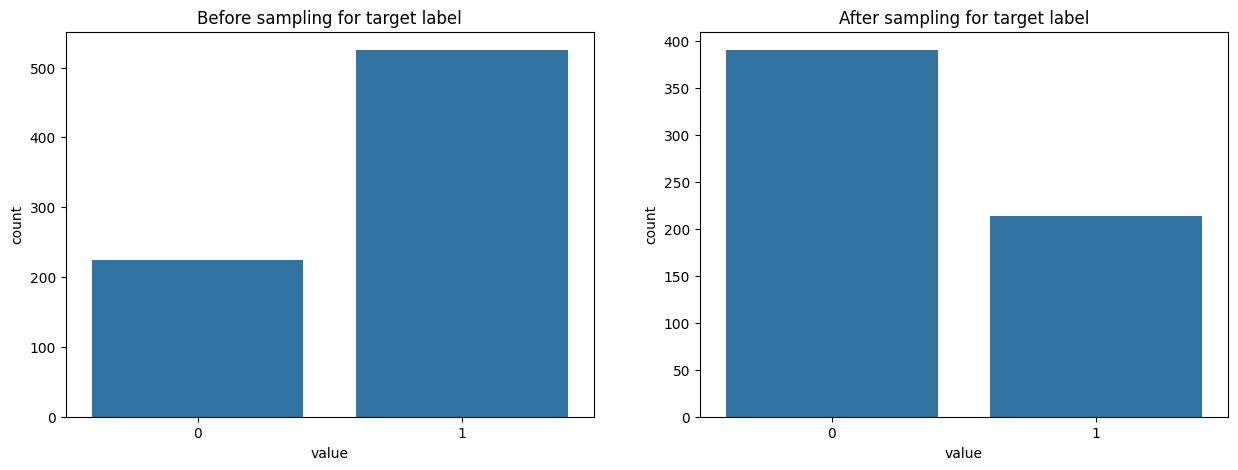

In [112]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
df_tmp = pd.DataFrame(y_fs_final_train, columns=['value'])
sns.countplot(x='value', data=df_tmp)
plt.title("Before sampling for target label")

fig.add_subplot(122)
df_tmp = pd.DataFrame(y_sme_sampling, columns=['value'])
sns.countplot(x='value', data=df_tmp)
plt.title("After sampling for target label")

### 3-3 Feature Reduction

In [113]:
from sklearn.decomposition import PCA

In [114]:
pca = PCA(n_components=2)  # 2차원으로 축소
X_pca = pca.fit_transform(np.array(X_fs_sme_sampling))

# 변환된 데이터의 형태를 확인
print("Original shape:", np.array(X_fs_sme_sampling).shape)
print("Reduced shape:", X_pca.shape)


Original shape: (603, 48)
Reduced shape: (603, 2)


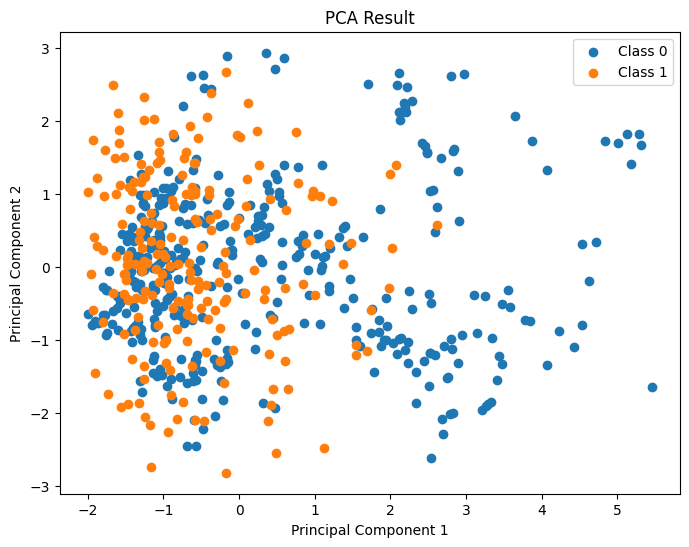

In [115]:
plt.figure(figsize=(8, 6))

# 고유한 클래스 레이블을 얻기 위해 set을 사용합니다.
unique_labels = set(y_sme_sampling)

for label in unique_labels:
    # 각 클래스에 대한 데이터 포인트를 추출합니다.
    idx = y_sme_sampling == label
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=f'Class {label}')

# 축 레이블과 제목 추가
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')

# 범례 추가
plt.legend()

# 그래프 보여주기
plt.show()